In [2]:
!pip install anndata
!pip install scanpy
!pip install decoupler

import anndata as ad
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import decoupler as dc

In [3]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [4]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [5]:
file_id = '1MZ6HmqiCeN5mJd2cYM498PgnNOV8goQ9'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('GTEX-1HSMQ-5005.h5ad')

In [6]:
!wget -O GTEX-1HSMQ-5005.h5ad  "https://drive.usercontent.google.com/download?id=1MZ6HmqiCeN5mJd2cYM498PgnNOV8goQ9&export=download&authuser=0&confirm=t&uuid=b3f632b6-8dd3-4cbe-aade-886aad76299c&at=APZUnTV6ape4OEBvDGLvCmNBfgp0%3A1714034617680"

adata = ad.read_h5ad('GTEX-1HSMQ-5005.h5ad')
adata

--2024-05-09 11:41:36--  https://drive.usercontent.google.com/download?id=1MZ6HmqiCeN5mJd2cYM498PgnNOV8goQ9&export=download&authuser=0&confirm=t&uuid=b3f632b6-8dd3-4cbe-aade-886aad76299c&at=APZUnTV6ape4OEBvDGLvCmNBfgp0%3A1714034617680
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.163.132, 2607:f8b0:4004:c1b::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.163.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444294630 (424M) [application/octet-stream]
Saving to: ‘GTEX-1HSMQ-5005.h5ad’

GTEX-1HSMQ-5005.h5a 100%[===================>] 423.71M  74.5MB/s    in 7.7s    

2024-05-09 11:41:44 (54.7 MB/s) - ‘GTEX-1HSMQ-5005.h5ad’ saved [444294630/444294630]



AnnData object with n_obs × n_vars = 14404 × 17695
    obs: 'n_genes', 'fpr', 'tissue', 'prep', 'individual', 'nGenes', 'nUMIs', 'PercentMito', 'PercentRibo', 'Age_bin', 'Sex', 'Sample ID', 'Participant ID', 'Sample ID short', 'RIN score from PAXgene tissue Aliquot', 'RIN score from Frozen tissue Aliquot', 'Autolysis Score', 'Sample Ischemic Time (mins)', 'Tissue Site Detail', 'scrublet', 'scrublet_score', 'barcode', 'batch', 'n_counts', 'tissue-individual-prep', 'Broad cell type', 'Granular cell type', 'introns', 'junctions', 'exons', 'sense', 'antisense', 'intergenic', 'batch-barcode', 'exon_ratio', 'intron_ratio', 'junction_ratio', 'log10_nUMIs', 'leiden', 'leiden_tissue', 'Tissue composition', 'Cell types level 2', 'Cell types level 3', 'Broad cell type numbers', 'Broad cell type (numbers)', 'Tissue', 'channel'
    var: 'gene_ids', 'Chromosome', 'Source', 'Start', 'End', 'Strand', 'gene_name', 'gene_source', 'gene_biotype', 'gene_length', 'gene_coding_length', 'Approved symbol', 'A

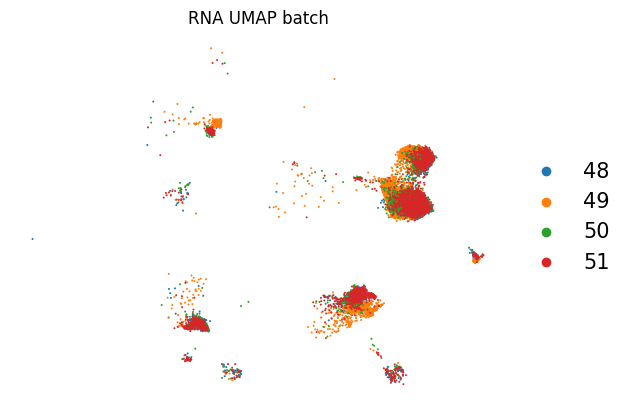

In [7]:
sc.pl.umap(adata, color = 'batch', title = 'RNA UMAP batch', frameon = False, legend_fontweight = 'normal', legend_fontsize = 15)


In [8]:
adata.obs['Broad cell type (numbers)']

CST01_GTTCGGGCAGGATTGG-lung    6. Epithelial cell (alveolar type II)
CST01_TCAACGAGTGCACTTA-lung    6. Epithelial cell (alveolar type II)
CST01_CTCGTCATCCTGTAGA-lung    6. Epithelial cell (alveolar type II)
CST01_TAGACCACATTCCTCG-lung         25. Immune (alveolar macrophage)
CST01_TTCTACAGTCTAAAGA-lung         25. Immune (alveolar macrophage)
                                               ...                  
TST01_GGCGTGTAGTACGCCC-lung    6. Epithelial cell (alveolar type II)
TST01_CCGGGATGTATAATGG-lung                   26. Immune (mast cell)
TST01_TGGGCGTAGGATATAC-lung    6. Epithelial cell (alveolar type II)
TST01_ATCATCTTCAAAGACA-lung           3. Endothelial cell (vascular)
TST01_GGCGTGTTCAATCTCT-lung     5. Epithelial cell (alveolar type I)
Name: Broad cell type (numbers), Length: 14404, dtype: category
Categories (15, object): ['2. Endothelial cell (lymphatic)', '3. Endothelial cell (vascular)',
                          '5. Epithelial cell (alveolar type I)', '6. Epithelial c

In [9]:
# DB score je manji u slucaju kada , tako da se moze zakljuciti da
# je kvalitet klasterizacije bolji onda kada (ne) radimo normalizaciju

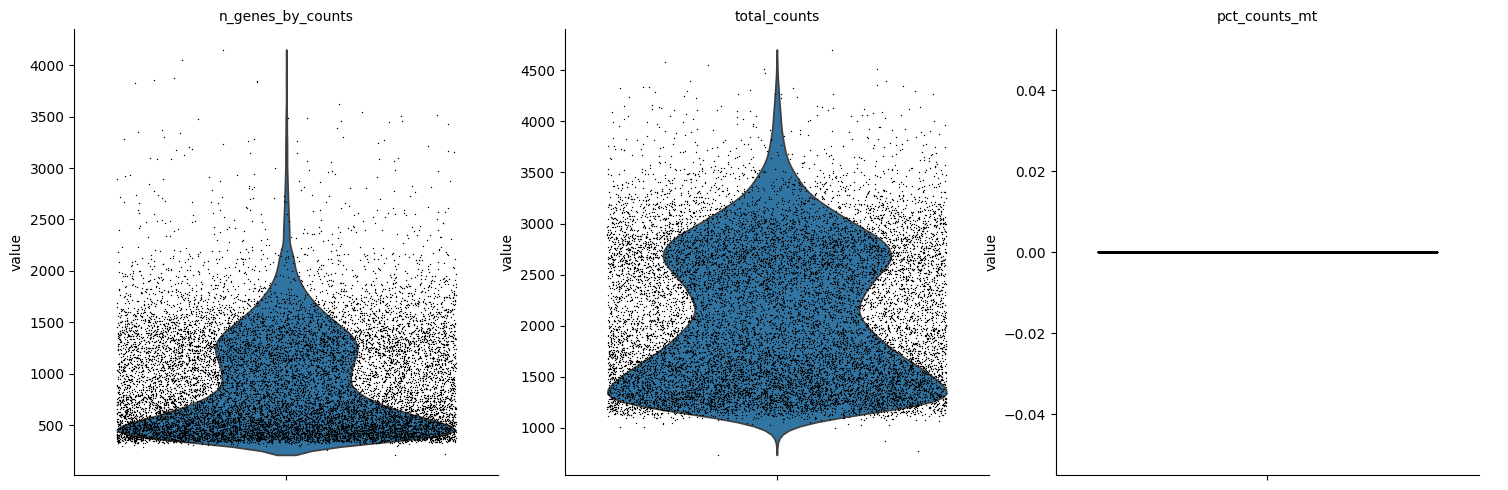

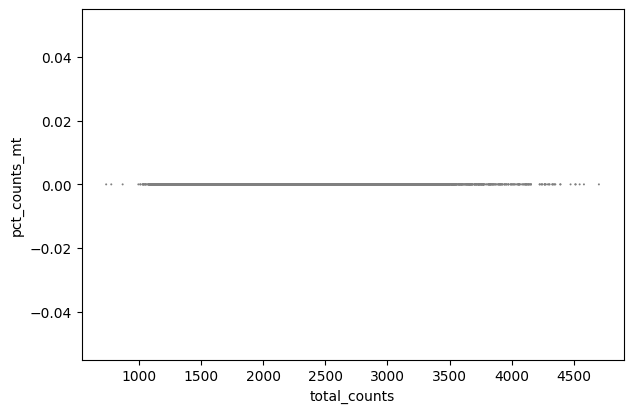

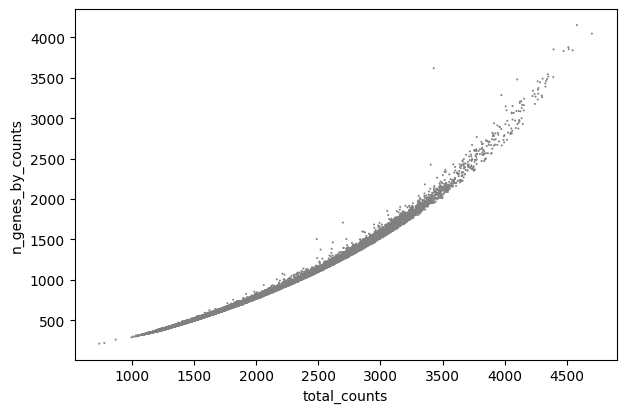

AnnData object with n_obs × n_vars = 14404 × 16803
    obs: 'n_genes', 'fpr', 'tissue', 'prep', 'individual', 'nGenes', 'nUMIs', 'PercentMito', 'PercentRibo', 'Age_bin', 'Sex', 'Sample ID', 'Participant ID', 'Sample ID short', 'RIN score from PAXgene tissue Aliquot', 'RIN score from Frozen tissue Aliquot', 'Autolysis Score', 'Sample Ischemic Time (mins)', 'Tissue Site Detail', 'scrublet', 'scrublet_score', 'barcode', 'batch', 'n_counts', 'tissue-individual-prep', 'Broad cell type', 'Granular cell type', 'introns', 'junctions', 'exons', 'sense', 'antisense', 'intergenic', 'batch-barcode', 'exon_ratio', 'intron_ratio', 'junction_ratio', 'log10_nUMIs', 'leiden', 'leiden_tissue', 'Tissue composition', 'Cell types level 2', 'Cell types level 3', 'Broad cell type numbers', 'Broad cell type (numbers)', 'Tissue', 'channel', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'Chromosome', 'Source', 'Start', 'End', 'Strand', 'gene_name', 'gene_source', '

In [10]:
sc.pp.filter_cells(adata, min_genes = 200)
sc.pp.filter_genes(adata, min_cells = 3)

adata.var['mt'] = adata.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata, qc_vars = ["mt"], percent_top = None, log1p =  False, inplace = True)
sc.pl.violin(adata, ["n_genes_by_counts", "total_counts", "pct_counts_mt"], jitter = 0.4, multi_panel = True)
sc.pl.scatter(adata, x = "total_counts", y = "pct_counts_mt")
sc.pl.scatter(adata, x = "total_counts", y = "n_genes_by_counts")
adata

In [11]:
adata = adata[adata.obs.n_genes_by_counts < 3500, :]

**SA NORMALIZACIJOM**

In [27]:
sc.pp.normalize_total(adata, target_sum = 1e4)
sc.pp.log1p(adata)
adata.layers['log_norm'] = adata.X.copy()

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_normalization.py:206: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 25.1 MB/s eta 0:00:00


<ipython-input-29-b49ca260447b>:23: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata)


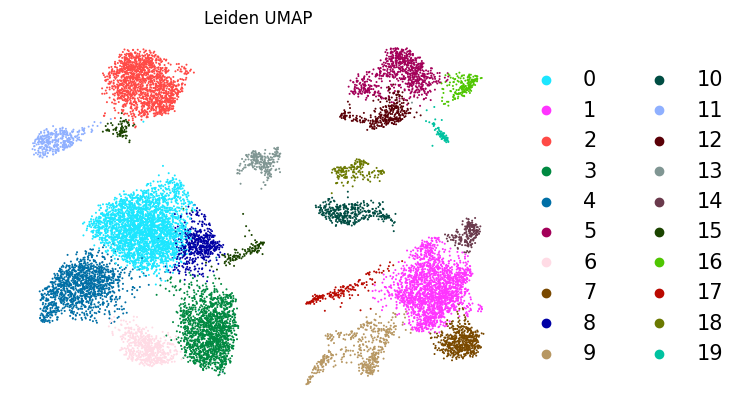

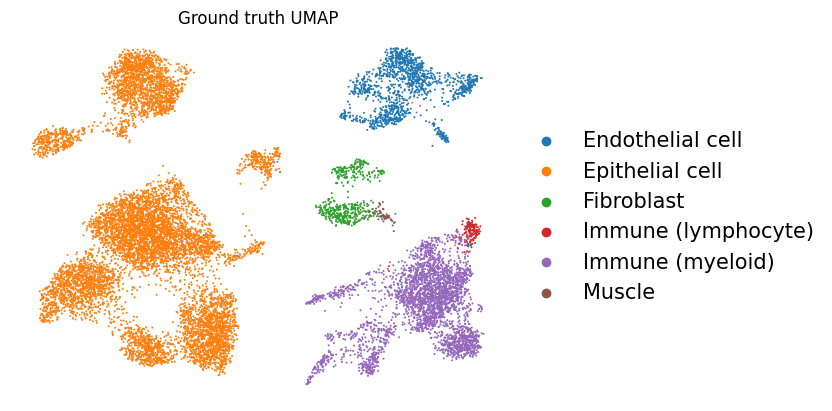

In [29]:
# identify the highly variable genes
sc.pp.highly_variable_genes(adata, min_mean = -.0125, max_mean = 3, min_disp = 0.5)

# Regress and scale the data
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])
sc.pp.scale(adata, max_value = 10)

# Generate PCA features
sc.tl.pca(adata, svd_solver = 'arpack')

# Restore X to be norm counts
dc.swap_layer(adata, 'log_norm', X_layer_key = None, inplace = True)

# Compute distances in the PCA space, and find cell neighbors
sc.pp.neighbors(adata, n_neighbors = 10, n_pcs = 40)

# Fenerate UMAP features
sc.tl.umap(adata)

# Run leiden clustering algorithm
! pip3 install igraph
!pip3 install leidenalg
sc.tl.leiden(adata)

# Visualize
sc.pl.umap(adata, color = 'leiden', title = 'Leiden UMAP',
           frameon = False, legend_fontweight = 'normal', legend_fontsize = 15)
sc.pl.umap(adata, color = 'Cell types level 2', title = 'Ground truth UMAP',
           frameon = False, legend_fontweight = 'normal', legend_fontsize = 15)

In [31]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin = davies_bouldin_score(adata.obsm['X_umap'], adata.obs['leiden'])

In [32]:
print(davies_bouldin)

0.9223457983964355


**BEZ NORMALIZACIJE**

In [12]:
sc.pp.log1p(adata)
adata.layers['log_norm'] = adata.X.copy()

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_simple.py:398: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


<ipython-input-13-b49ca260447b>:23: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata)


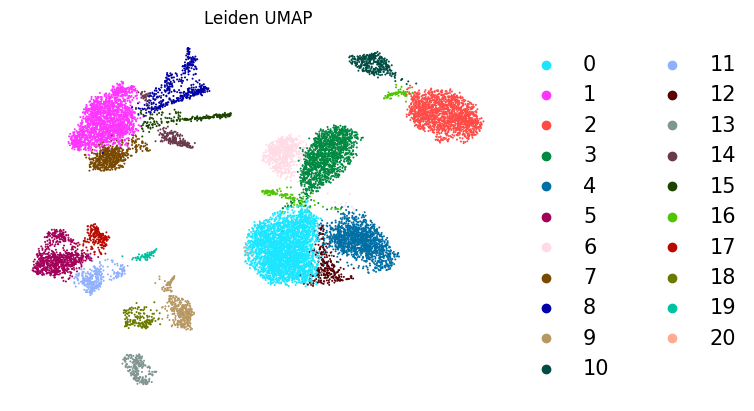

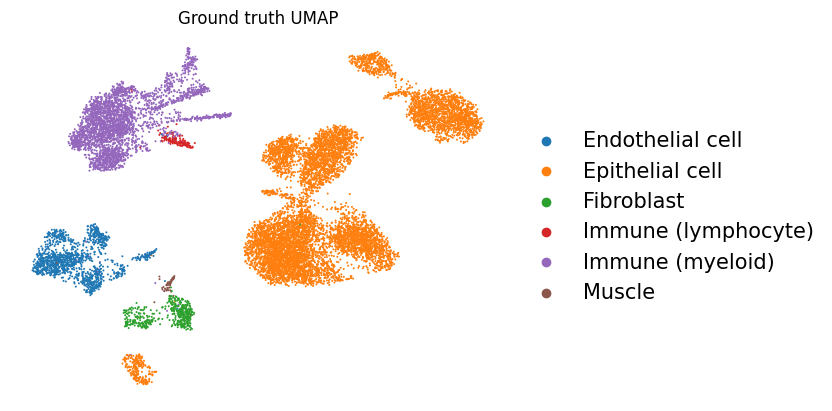

In [13]:
# identify the highly variable genes
sc.pp.highly_variable_genes(adata, min_mean = -.0125, max_mean = 3, min_disp = 0.5)

# Regress and scale the data
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])
sc.pp.scale(adata, max_value = 10)

# Generate PCA features
sc.tl.pca(adata, svd_solver = 'arpack')

# Restore X to be norm counts
dc.swap_layer(adata, 'log_norm', X_layer_key = None, inplace = True)

# Compute distances in the PCA space, and find cell neighbors
sc.pp.neighbors(adata, n_neighbors = 10, n_pcs = 40)

# Fenerate UMAP features
sc.tl.umap(adata)

# Run leiden clustering algorithm
! pip3 install igraph
!pip3 install leidenalg
sc.tl.leiden(adata)

# Visualize
sc.pl.umap(adata, color = 'leiden', title = 'Leiden UMAP',
           frameon = False, legend_fontweight = 'normal', legend_fontsize = 15)
sc.pl.umap(adata, color = 'Cell types level 2', title = 'Ground truth UMAP',
           frameon = False, legend_fontweight = 'normal', legend_fontsize = 15)

In [14]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_no_norm = davies_bouldin_score(adata.obsm['X_umap'], adata.obs['leiden'])

In [15]:
print(davies_bouldin_no_norm)

3.865433512152088


In [ ]:
# sa norm: 0.9223457983964355
# bez norm: 3.865433512152088

# DB score je manji u slucaju kada primenjujemo normalizaciju, tako da se moze zakljuciti da
# je kvalitet klasterizacije bolji onda kada radimo normalizaciju